### Classificação
Analisar o dataset 'iris' disponibilizado na pasta data, criar um modelo de classificação para os dados e avaliar as métricas

#### Importando bibliotecas

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criação do modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Avaliação de métricas
from sklearn.metrics import accuracy_score

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/bf/2c/a0cee9c392a4c9227b835af27f9260582b994f9a2b5ec23993b596e5deb7/pandas-2.2.2-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.22.4 from https://files.pythonhosted.org/packages/52/87/bb45780eb4b9ed1e4710c2f2b42ed7224071aef6f08152f2520df0ec2ee5/numpy-2.0.1-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.9 kB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 60.9/60.9 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cd


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/71/a8/9b18bd1fef16f71821c890b4db3697be5102f2b839765d9608479cd33874/matplotlib-3.9.2-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/62/5c/08e3a7a35762c8decb6be01c7ec1f4b5f85ef2e2fbb44af87e9caf25a879/contourpy-1.2.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/f2/d5/f7d2122140848fb7a7bd1d59881b822dd514c19b7648984b7565d9f39d56/fonttools-4.53.1-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -------------------------------------- 165.9/165.9 kB 4.9 MB/s eta 0:0


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------------------------------ --- 266.2/294.9 kB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/ed/941b210029c1051233b082a19c36b930f56dda34a8a5227dbbd1bc08f7eb/scikit_learn-1.5.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/3e/77/dab54fe647a08ee4253963bcd8f9cf17509c8ca64d6335141422fe2e2114/scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Leitura de dados

In [2]:
data = pd.read_csv("data/iris.csv")
data.head() # imprimir 5 primeiros registros

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


O conjunto de dados Iris é um conjunto de dados clássico frequentemente usado em aprendizado de máquina e estatística para fins de demonstração e prática. Ele contém informações sobre amostras de três espécies diferentes de íris: Iris setosa, Iris virginica e Iris versicolor. Cada amostra possui quatro características medidas em centímetros Sépala comprimento/tamanho e Comprimento/tamanho de pétala.

![Imagem de iris](imagens/Flores_de_Íris.png)


#### Análise exploratória

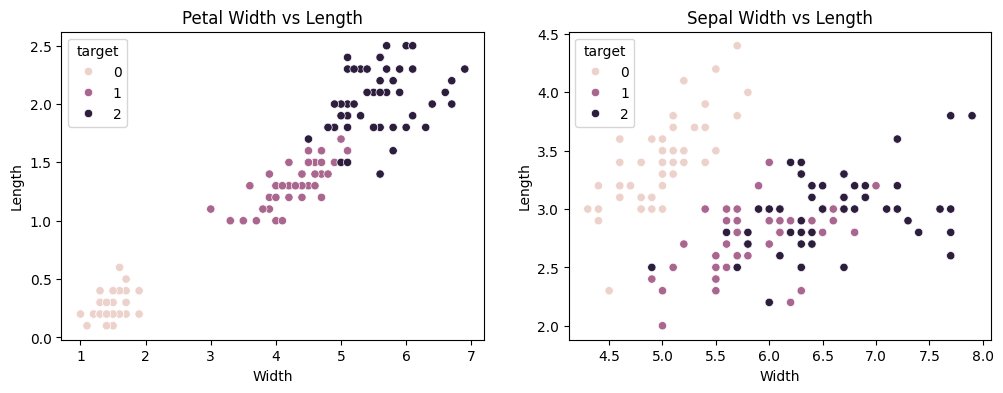

In [3]:
#Configura o Tamanho da Imagem 12 x 4 Polegadas
plt.figure(figsize=(12,4))

#Cria um sub plot (serve para colocar um gráfico do lado do outro, neste exemplo)
plt.subplot(1,2,1)

#Usa a biblioteca Seaborn para ler o Dataset e plotar em um gráfico de dispersão
sns.scatterplot(data=data, x = "petal length (cm)", y = "petal width (cm)", hue = "target")
plt.title("Petal Width vs Length")
plt.xlabel("Width")
plt.ylabel("Length")

#O mesmo procedimento para o segundo gráfico
plt.subplot(1,2,2)
sns.scatterplot(data=data, x = "sepal length (cm)", y = "sepal width (cm)", hue = "target")
plt.title("Sepal Width vs Length")
plt.xlabel("Width")
plt.ylabel("Length")

plt.show()

#### Definição do modelo e treino

In [4]:
# instanciando modelos
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

In [5]:
# Separando dados
## Variáveis preditoras
X = data.loc[:,["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
X = np.array(X)

## Variável alvo
y = data["target"]
y = np.array(y)

## Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(f"Tamanho X de treino: {X_train.shape}")
print(f"Tamanho X de teste: {X_test.shape}")
print(f"Tamanho y de treino: {y_train.shape}")
print(f"Tamanho y de teste: {y_test.shape}")

Tamanho X de treino: (120, 4)
Tamanho X de teste: (30, 4)
Tamanho y de treino: (120,)
Tamanho y de teste: (30,)


In [6]:
print(data.loc[:,["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [7]:
# Treinando modelos
tree.fit(X_train, y_train)

rf.fit(X_train, y_train)

knn.fit(X_train, y_train)

KNeighborsClassifier()

#### Testando e avaliando modelos

In [8]:
# Prevendo valores
tree_predict = tree.predict(X_test)

rf_predict = rf.predict(X_test)

knn_predict = knn.predict(X_test)

In [13]:
print(tree_predict)
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [9]:
# Avaliação
tree_score = accuracy_score(y_test, tree_predict)
rf_score = accuracy_score(y_test, rf_predict)
knn_score = accuracy_score(y_test, knn_predict)

print(f"Pontuação Decision Tree:{tree_score}")
print(f"Pontuação Random Forest:{rf_score}")
print(f"Pontuação KNN:{knn_score}")

Pontuação Decision Tree:1.0
Pontuação Random Forest:1.0
Pontuação KNN:0.9666666666666667


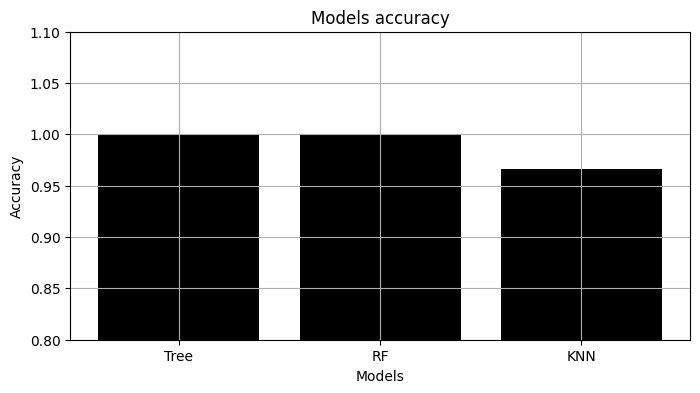

In [10]:
# Plotando resultados
plt.figure(figsize = (8,4))
plt.title("Models accuracy")
plt.bar(x = [0,1,2], height = [tree_score, rf_score, knn_score], color = "black")
plt.xticks([0,1,2], ["Tree","RF", "KNN"])
plt.ylim(0.8,1.1)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.grid()
plt.show()

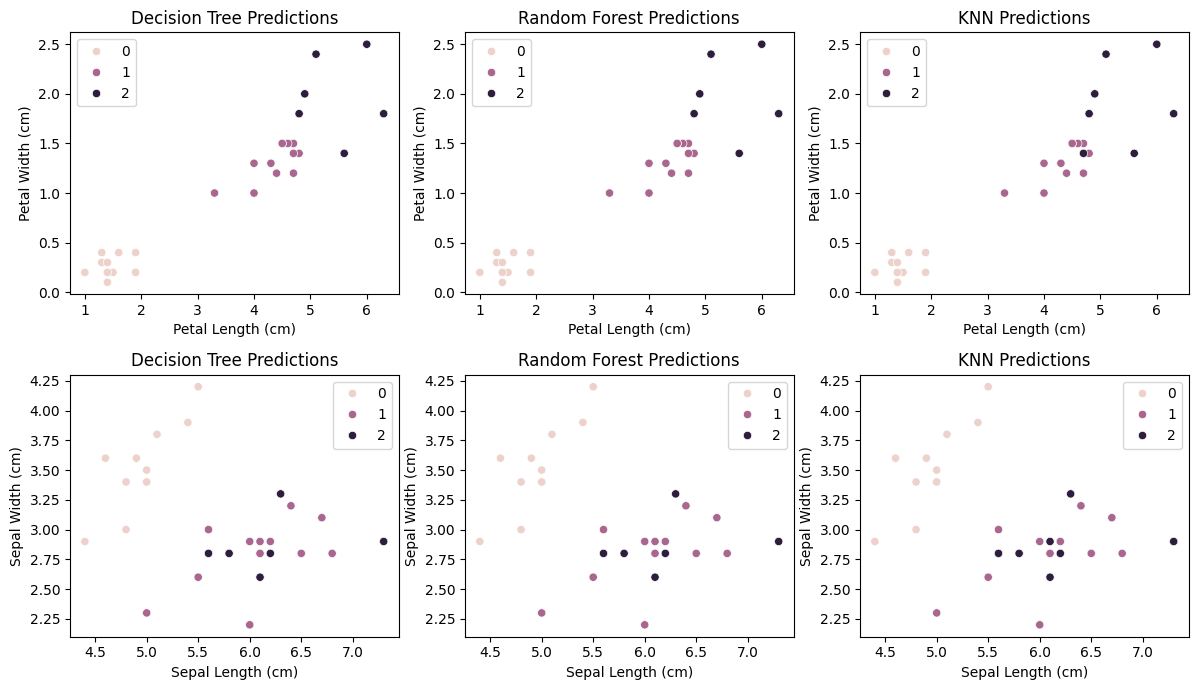

In [11]:

# Plotando os resultados
plt.figure(figsize=(12, 7))

# Plot para Árvore de Decisão
plt.subplot(2, 3, 4)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=tree_predict)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Decision Tree Predictions')

# Plot para Floresta Aleatória
plt.subplot(2, 3, 5)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=rf_predict)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Random Forest Predictions')

# Plot para KNN
plt.subplot(2, 3, 6)
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=knn_predict)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KNN Predictions')


# Plot para Árvore de Decisão
plt.subplot(2, 3, 1)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=tree_predict)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Decision Tree Predictions')

# Plot para Floresta Aleatória
plt.subplot(2, 3, 2)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=rf_predict)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Random Forest Predictions')

# Plot para KNN
plt.subplot(2, 3, 3)
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 3], hue=knn_predict)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KNN Predictions')

plt.tight_layout()
plt.show()


#### Exercício

Fazer a Classificação do DataSet "Wine" de vinhos na pasta Data usando qualquer um dos algoritimos de Treino.

![Dataset wine](imagens/vinho.jpg)

Não é necessário usar os três algoritmos. Pode só escolher um e fazer o exercício.

#### Wine Dataset

#### Leitura dos Dados

Leia o wine.csv e use a função head para mostrar os primeiros elementos

#### Análise Exploratória

Como esse Dataset possui muitas variáveis, plote um gráfico de histograma para facilitar. Basta usar a função data.hist(figsize=(15,10))

#### Definição do Modelo e treino

#### Instâncie o seu modelo

#### Separando Variáveis

A coluna alvo é a coluna 'Wine' que tem os tipos 1, 2 e 3 de vinhos. Separe o alvo(y) das features(x).
Dica: Use a função X = data.drop('Wine', axis=1) para remover a coluna de target. É mais fácil so que selecionar todos as colunas que não são alvo

#### Divida os dados x e y em treino e teste da forma que foi mostrada em Irís

#### Treinando os Modelos

#### Testando e valiando os Modelos

Prevendo os valores

Mostre a precisão do Algoritmo que foi escolhido. Não é necessário plotar